In [1]:
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer, transpile

c:\Python310\lib\site-packages\qiskit\visualization\circuit\latex.py:154: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, _ = load_style(style)


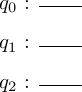

In [2]:
oracle_cst = QuantumCircuit(3)

oracle_cst.draw()

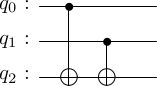

In [3]:
oracle_bal = QuantumCircuit(3)
oracle_bal.cx(0,2)
oracle_bal.cx(1,2)

oracle_bal.draw()

c:\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


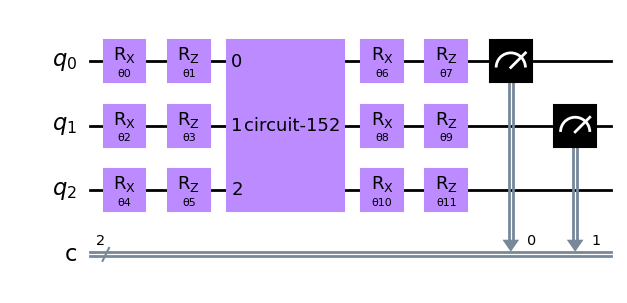

In [4]:
ml_deutsch_train_cst = QuantumCircuit(3,2)

th_0 = Parameter("θ0")
ml_deutsch_train_cst.rx(th_0,0)
th_1 = Parameter("θ1")
ml_deutsch_train_cst.rz(th_1,0)

th_2 = Parameter("θ2")
ml_deutsch_train_cst.rx(th_2,1)
th_3 = Parameter("θ3")
ml_deutsch_train_cst.rz(th_3,1)

th_4 = Parameter("θ4")
ml_deutsch_train_cst.rx(th_4,2)
th_5 = Parameter("θ5")
ml_deutsch_train_cst.rz(th_5,2)

ml_deutsch_train_cst.append(oracle_cst, [0,1,2])

th_6 = Parameter("θ6")
ml_deutsch_train_cst.rx(th_6,0)
th_7 = Parameter("θ7")
ml_deutsch_train_cst.rz(th_7,0)

th_8 = Parameter("θ8")
ml_deutsch_train_cst.rx(th_8,1)
th_9 = Parameter("θ9")
ml_deutsch_train_cst.rz(th_9,1)

th_10 = Parameter("θ10")
ml_deutsch_train_cst.rx(th_10,2)
th_11 = Parameter("θ11")
ml_deutsch_train_cst.rz(th_11,2)

ml_deutsch_train_cst.measure(0,0)
ml_deutsch_train_cst.measure(1,1)

ml_deutsch_train_cst.draw("mpl")

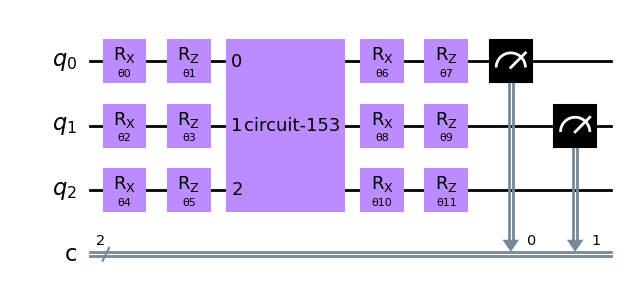

In [5]:
ml_deutsch_train_bal = QuantumCircuit(3,2)

th_0 = Parameter("θ0")
ml_deutsch_train_bal.rx(th_0,0)
th_1 = Parameter("θ1")
ml_deutsch_train_bal.rz(th_1,0)

th_2 = Parameter("θ2")
ml_deutsch_train_bal.rx(th_2,1)
th_3 = Parameter("θ3")
ml_deutsch_train_bal.rz(th_3,1)

th_4 = Parameter("θ4")
ml_deutsch_train_bal.rx(th_4,2)
th_5 = Parameter("θ5")
ml_deutsch_train_bal.rz(th_5,2)

ml_deutsch_train_bal.append(oracle_bal, [0,1,2])

th_6 = Parameter("θ6")
ml_deutsch_train_bal.rx(th_6,0)
th_7 = Parameter("θ7")
ml_deutsch_train_bal.rz(th_7,0)

th_8 = Parameter("θ8")
ml_deutsch_train_bal.rx(th_8,1)
th_9 = Parameter("θ9")
ml_deutsch_train_bal.rz(th_9,1)

th_10 = Parameter("θ10")
ml_deutsch_train_bal.rx(th_10,2)
th_11 = Parameter("θ11")
ml_deutsch_train_bal.rz(th_11,2)

ml_deutsch_train_bal.measure(0,0)
ml_deutsch_train_bal.measure(1,1)

ml_deutsch_train_bal.draw("mpl")

In [10]:
simulator = Aer.get_backend('aer_simulator')

def try_angles(*angles):
    try_bal = ml_deutsch_train_bal.assign_parameters({
        th_0 : angles[0],
        th_1 : angles[1],
        th_2 : angles[2],
        th_3 : angles[3],
        th_4 : angles[4],
        th_5 : angles[5],
        th_6 : angles[6],
        th_7 : angles[7],
        th_8 : angles[8],
        th_9 : angles[9],
        th_10 : angles[10],
        th_11 : angles[11]
    })

    circ = transpile(try_bal, simulator)
    
    # Run and get counts
    result = simulator.run(circ).result()
    counts = result.get_counts(circ)
    return counts

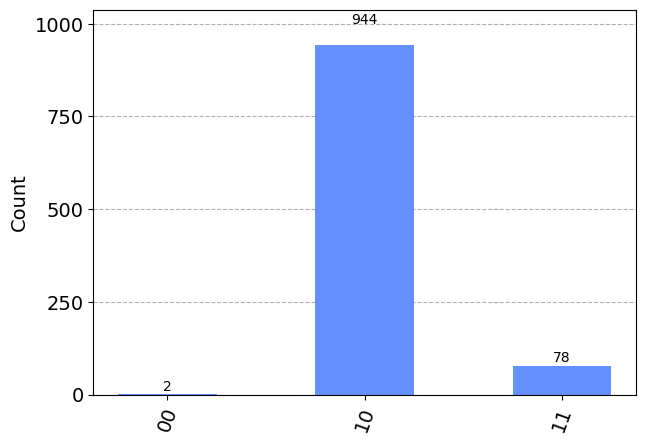

In [17]:
plot_histogram(try_angles(0.5,0.7,3,0.9,0,0.5,0,0,0,2,0,0))